# **1. Perkenalan Dataset**


1. **Sumber Dataset**:  
   Dataset yang diperoleh merupakan deteksi [penipuan transaksi](https://www.kaggle.com/datasets/samayashar/fraud-detection-transactions-dataset) yang didapat melalui Kaggle


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# # Gantilah ID file dengan ID dari Google Drive URL
# file_id = '19IfOP0QmCHccMu8A6B2fCUpFqZwCxuzO'

# # Buat URL unduhan langsung
# download_url = f'https://drive.google.com/uc?id={file_id}'

# Baca file CSV dari URL
df = pd.read_csv("synthetic_fraud_dataset.csv")

# Tampilkan DataFrame untuk memastikan telah dibaca dengan benar
df.head()

Transaction_ID    User_ID  Transaction_Amount Transaction_Type  \
0      TXN_33553  USER_1834               39.79              POS   
1       TXN_9427  USER_7875                1.19    Bank Transfer   
2        TXN_199  USER_2734               28.96           Online   
3      TXN_12447  USER_2617              254.32   ATM Withdrawal   
4      TXN_39489  USER_2014               31.28              POS   

             Timestamp  Account_Balance Device_Type  Location  \
0  2023-08-14 19:30:00         93213.17      Laptop    Sydney   
1  2023-06-07 04:01:00         75725.25      Mobile  New York   
2  2023-06-20 15:25:00          1588.96      Tablet    Mumbai   
3  2023-12-07 00:31:00         76807.20      Tablet  New York   
4  2023-11-11 23:44:00         92354.66      Mobile    Mumbai   

  Merchant_Category  IP_Address_Flag  ...  Daily_Transaction_Count  \
0            Travel                0  ...                        7   
1          Clothing                0  ...                       13   
2       Restaurants                0  ...                       14   
3          Clothing                0  ...                        8   
4       Electronics                0  ...                       14   

   Avg_Transaction_Amount_7d  Failed_Transaction_Count_7d   Card_Type  \
0                     437.63                            3        Amex   
1                     478.76                            4  Mastercard   
2                      50.01                            4        Visa   
3                     182.48                            4        Visa   
4                     328.69                            4  Mastercard   

  Card_Age  Transaction_Distance  Authentication_Method Risk_Score  \
0       65                883.17              Biometric     0.8494   
1      186               2203.36               Password     0.0959   
2      226               1909.29              Biometric     0.8400   
3       76               1311.86                    OTP     0.7935   
4      140                966.98               Password     0.3819   

   Is_Weekend  Fraud_Label  
0           0            0  
1           0            1  
2           0            1  
3           0            1  
4           1            1  

[5 rows x 21 columns]

In [3]:
print("\nInformasi dataset:")
df.info()


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-

ID Transaksi: Pengidentifikasi unik untuk setiap transaksi

ID Pengguna: Pengidentifikasi unik untuk pengguna

Jumlah Transaksi:	Jumlah uang yang terlibat dalam transaksi

Jenis Transaksi:	Jenis transaksi ( Online, In-Store, ATM, dll.)

Cap waktu:	Tanggal dan waktu transaksi

Saldo_Akun:	Saldo rekening pengguna sebelum transaksi

Jenis_Perangkat:	Jenis perangkat yang digunakan ( Mobile, Desktop, dll.)

Lokasi:	Lokasi geografis transaksi

Kategori_Pedagang:	Jenis pedagang ( Retail, Food, Travel, dll.)

Bendera_Alamat_IP:	Apakah alamat IP ditandai sebagai mencurigakan ( 0 atau 1)
Aktivitas_Penipuan_Sebelumnya:	Jumlah aktivitas penipuan yang pernah dilakukan oleh pengguna.

Jumlah Transaksi Harian:	Jumlah transaksi yang dilakukan oleh pengguna pada hari itu

Rata-rata_Jumlah_Transaksi_7d:	Rata-rata jumlah transaksi pengguna dalam 7 hari terakhir

Jumlah Transaksi Gagal 7 hari:	Jumlah transaksi gagal dalam 7 hari terakhir

Jenis Kartu:	Jenis kartu pembayaran yang digunakan ( Credit, Debit, Prepaid, dll.)

Usia Kartu:	Usia kartu dalam bulan

Jarak Transaksi:	Jarak antara lokasi pengguna biasanya dan lokasi transaksi.

Metode_Autentikasi:	Bagaimana pengguna melakukan autentikasi ( PIN, Biometric, dll.)

Skor_Risiko:	Skor risiko penipuan yang dihitung untuk transaksi tersebut.

Apakah_AkhirPekan:	Apakah transaksi tersebut terjadi pada akhir pekan ( 0atau 1)

Label_Penipuan:	Variabel target ( 0 = Not Fraud, 1 = Fraud)

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

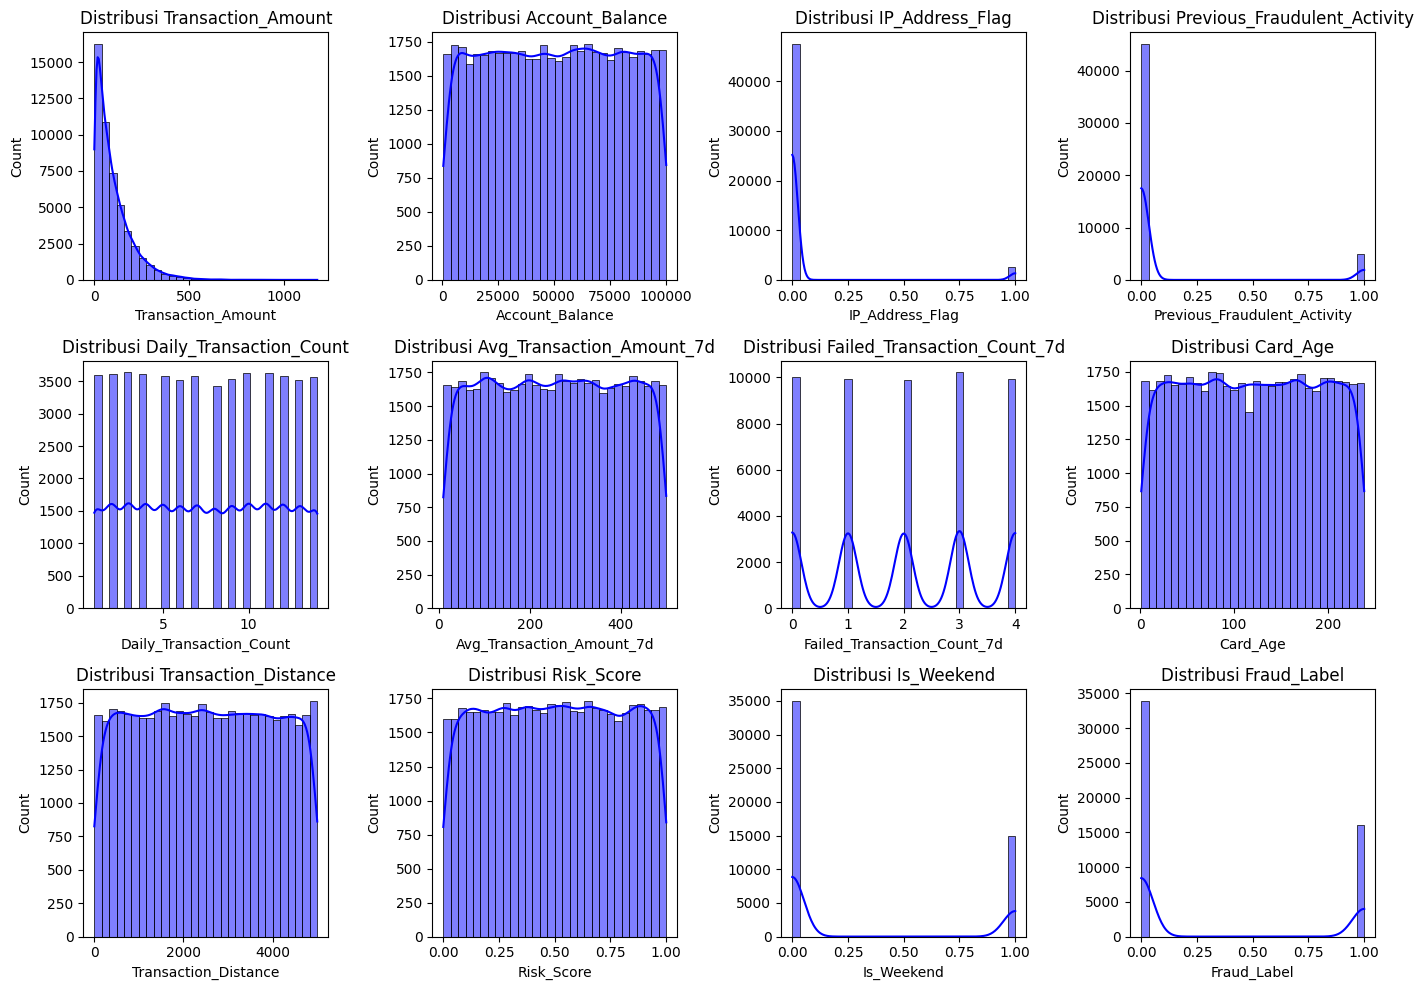

In [4]:
# Distribusi fitur numerik
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

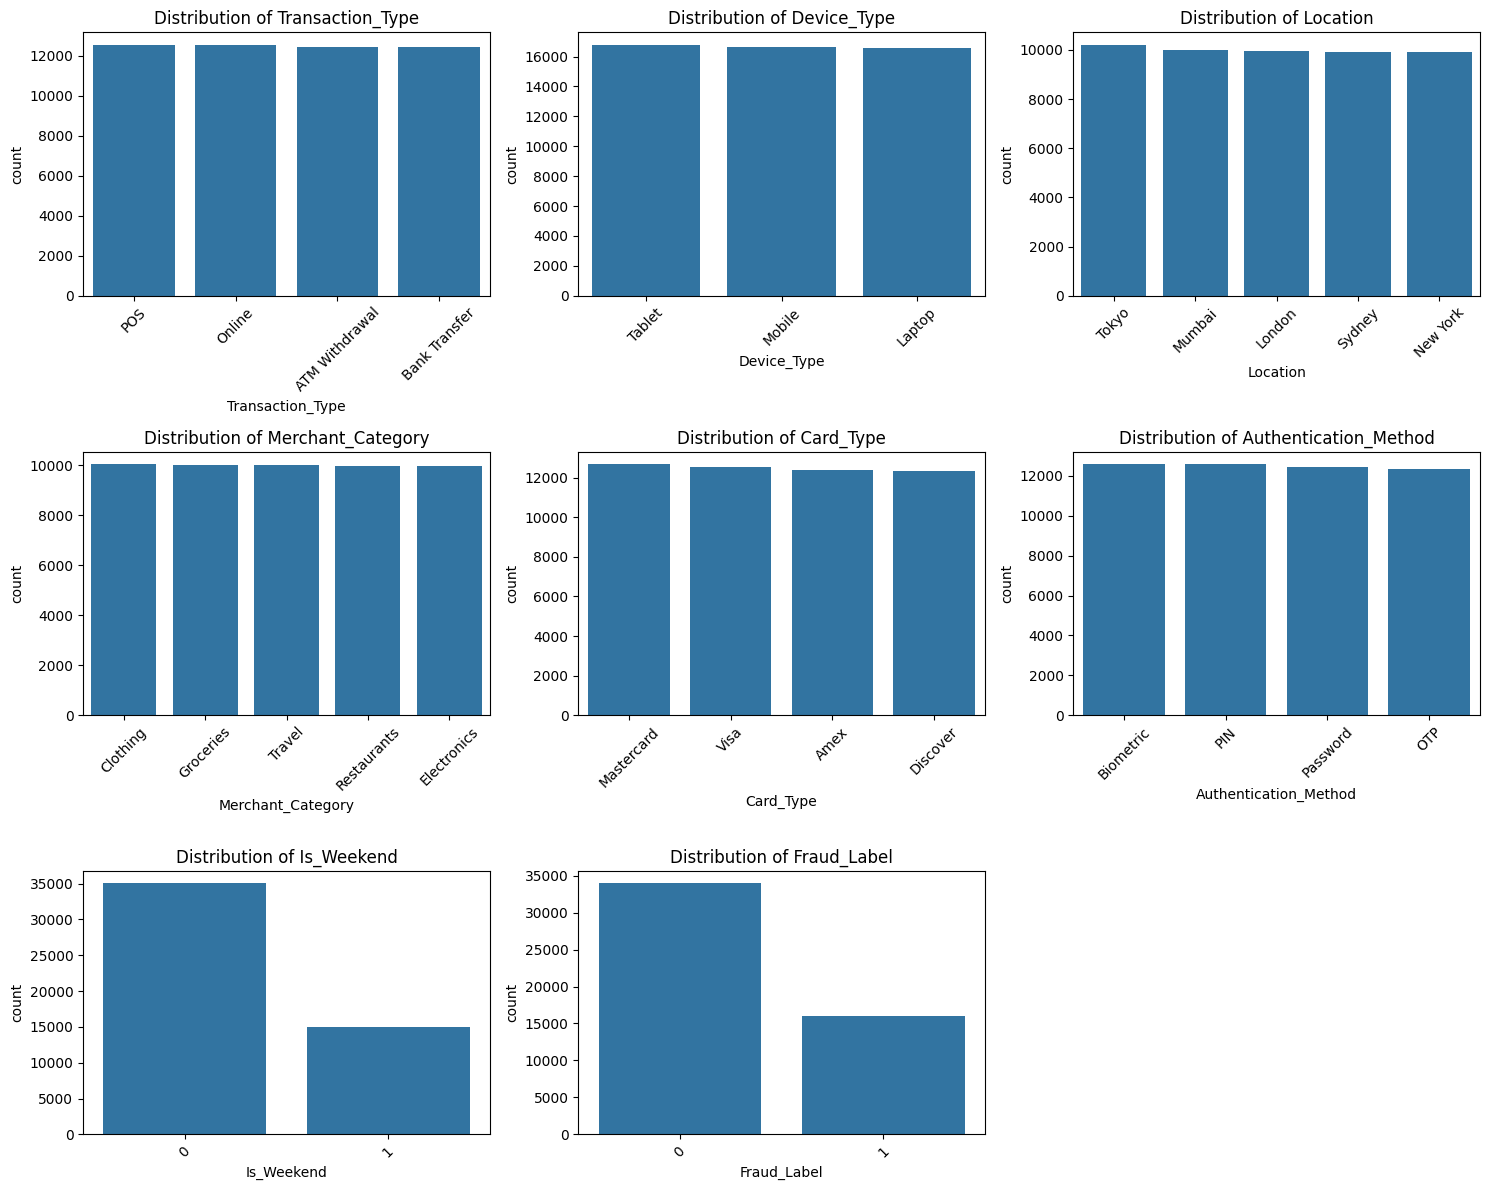

In [5]:
categorical_columns = [
    "Transaction_Type", "Device_Type", "Location", "Merchant_Category",
    "Card_Type", "Authentication_Method", "Is_Weekend", "Fraud_Label"
]

plt.figure(figsize=(15, 12))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

## Distribusi Variabel Target

/tmp/ipython-input-1752918832.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Fraud_Label', data=df, palette='viridis')


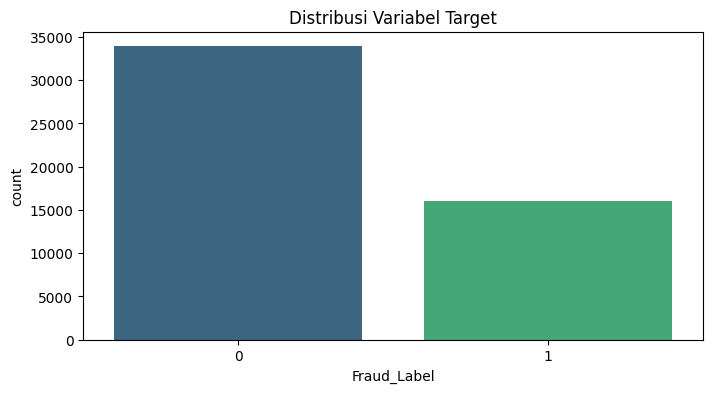

In [6]:
# Visualisasi distribusi variabel target
plt.figure(figsize=(8, 4))
sns.countplot(x='Fraud_Label', data=df, palette='viridis')
plt.title('Distribusi Variabel Target')
plt.show()

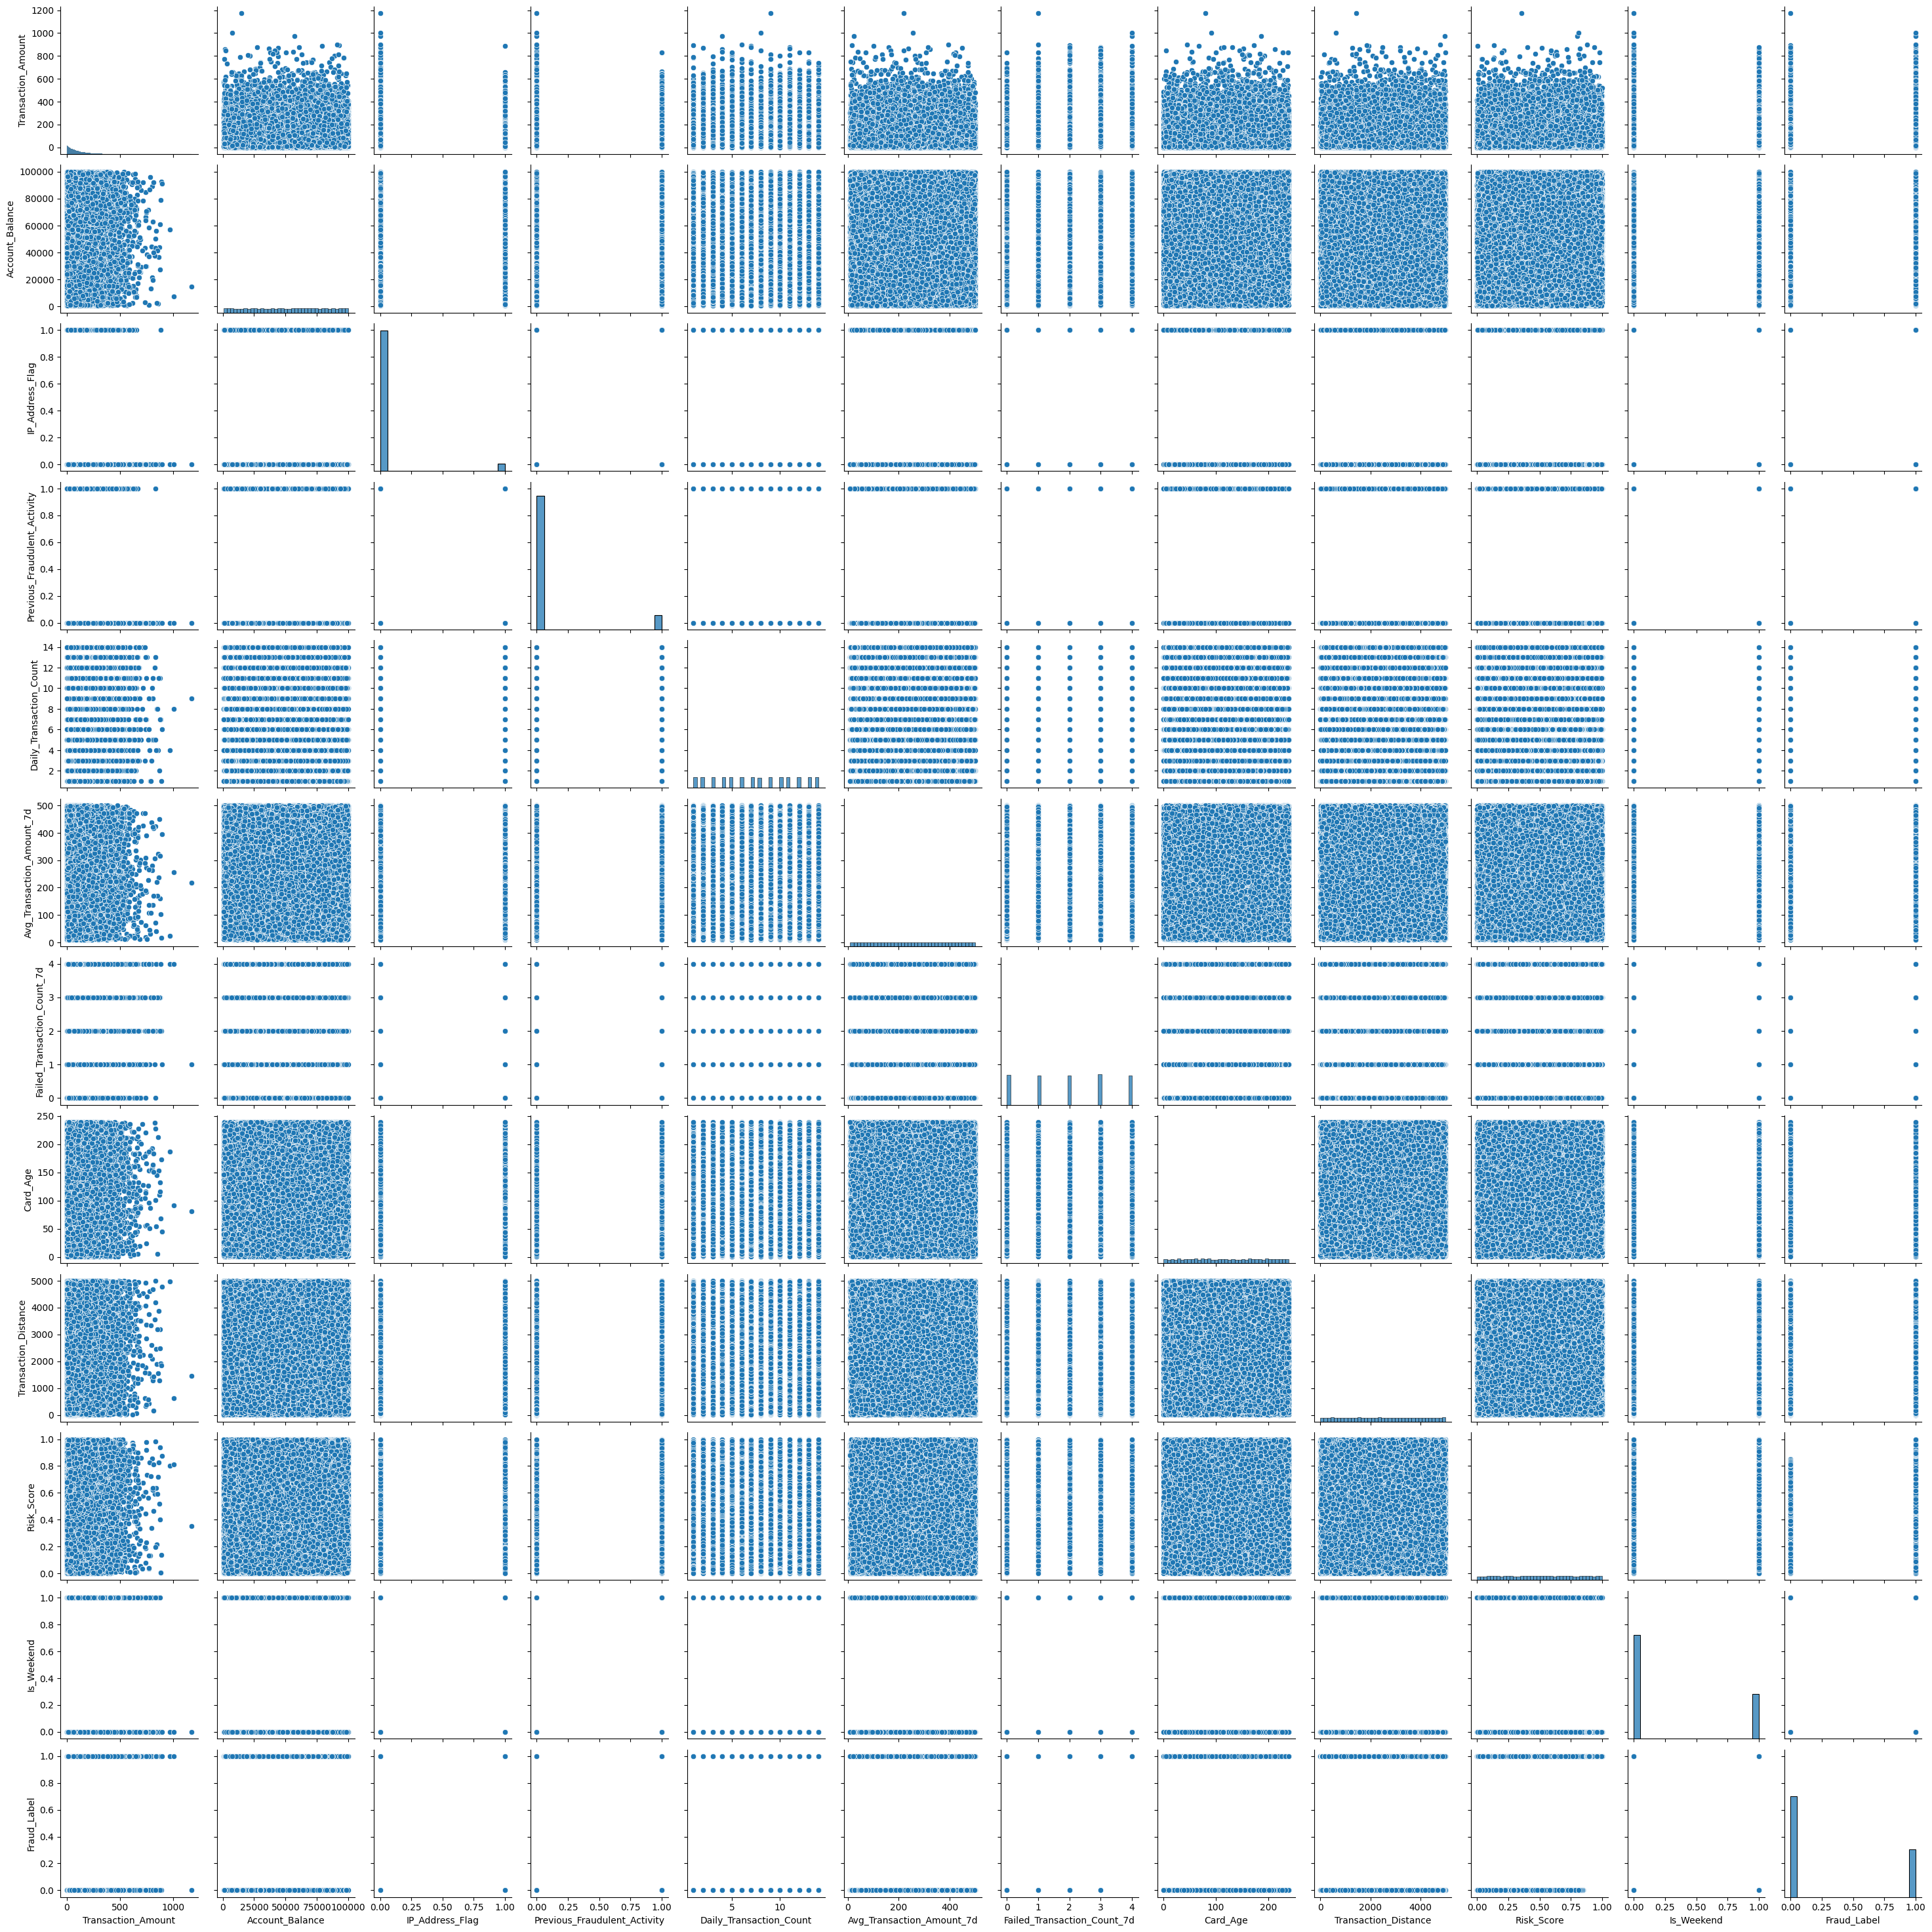

In [7]:
# Pairplot untuk fitur numerik
sns.pairplot(num_features)
plt.show()

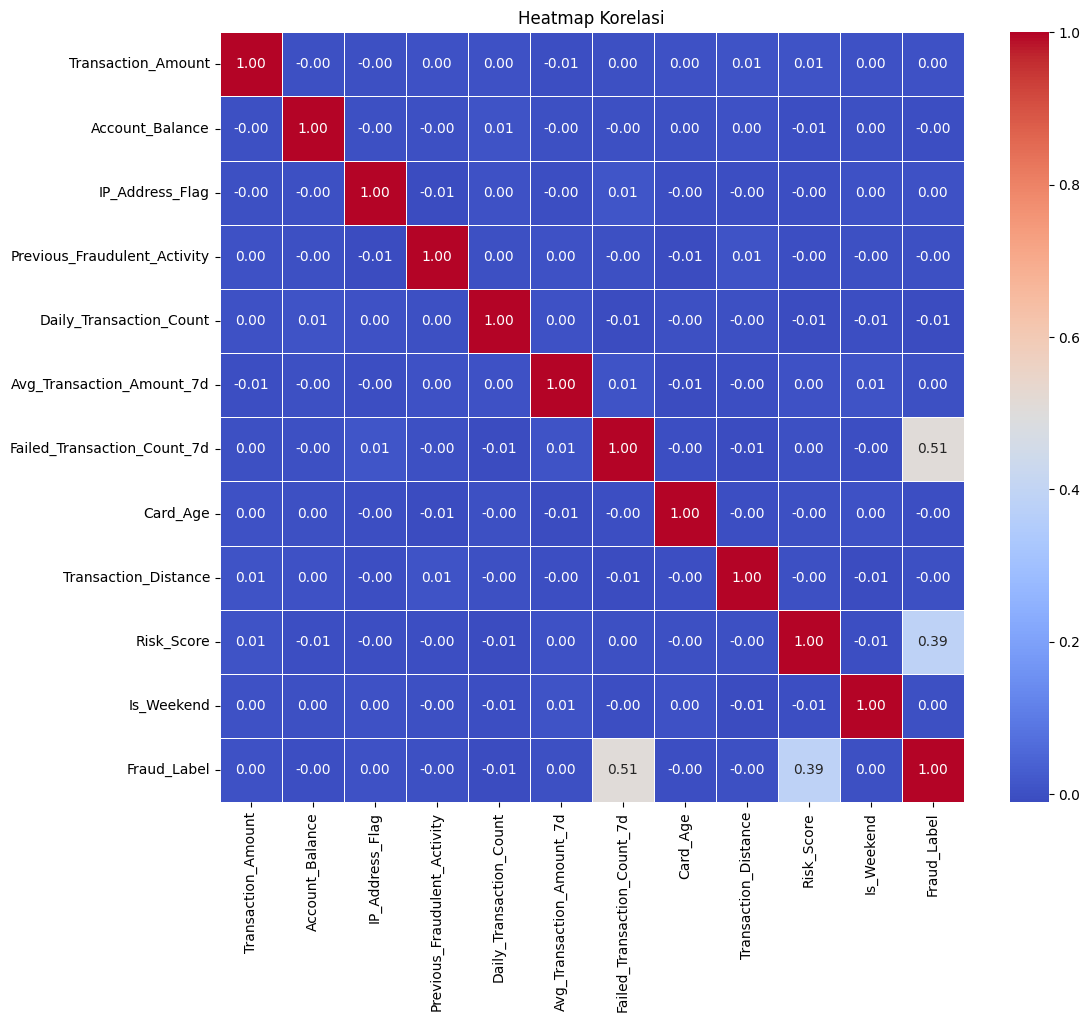

In [8]:
# Heatmap korelasi untuk fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

### Nilai Kosong

In [9]:
# Cek nilai yang hilang

missing_values = df.isnull().sum()
print("Jumlah Missing Values per Kolom:")
print(missing_values)

Jumlah Missing Values per Kolom:
Transaction_ID                  0
User_ID                         0
Transaction_Amount              0
Transaction_Type                0
Timestamp                       0
Account_Balance                 0
Device_Type                     0
Location                        0
Merchant_Category               0
IP_Address_Flag                 0
Previous_Fraudulent_Activity    0
Daily_Transaction_Count         0
Avg_Transaction_Amount_7d       0
Failed_Transaction_Count_7d     0
Card_Type                       0
Card_Age                        0
Transaction_Distance            0
Authentication_Method           0
Risk_Score                      0
Is_Weekend                      0
Fraud_Label                     0
dtype: int64


### Nilai Duplikat

In [10]:
# Mengecek nilai duplikat

duplicate_rows = df.duplicated().sum()
print(f"Jumlah baris duplikat: {duplicate_rows}")

Jumlah baris duplikat: 0


### Nilai Outliers

In [11]:
outlier_columns = []

for column in df.select_dtypes(include=['number']).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    if not outliers.empty:
        outlier_columns.append(column)
        print(f"Column '{column}' has {len(outliers)} outliers.")

print("Columns with outliers:", outlier_columns)

Column 'Transaction_Amount' has 2260 outliers.
Column 'IP_Address_Flag' has 2510 outliers.
Column 'Previous_Fraudulent_Activity' has 4920 outliers.
Columns with outliers: ['Transaction_Amount', 'IP_Address_Flag', 'Previous_Fraudulent_Activity']


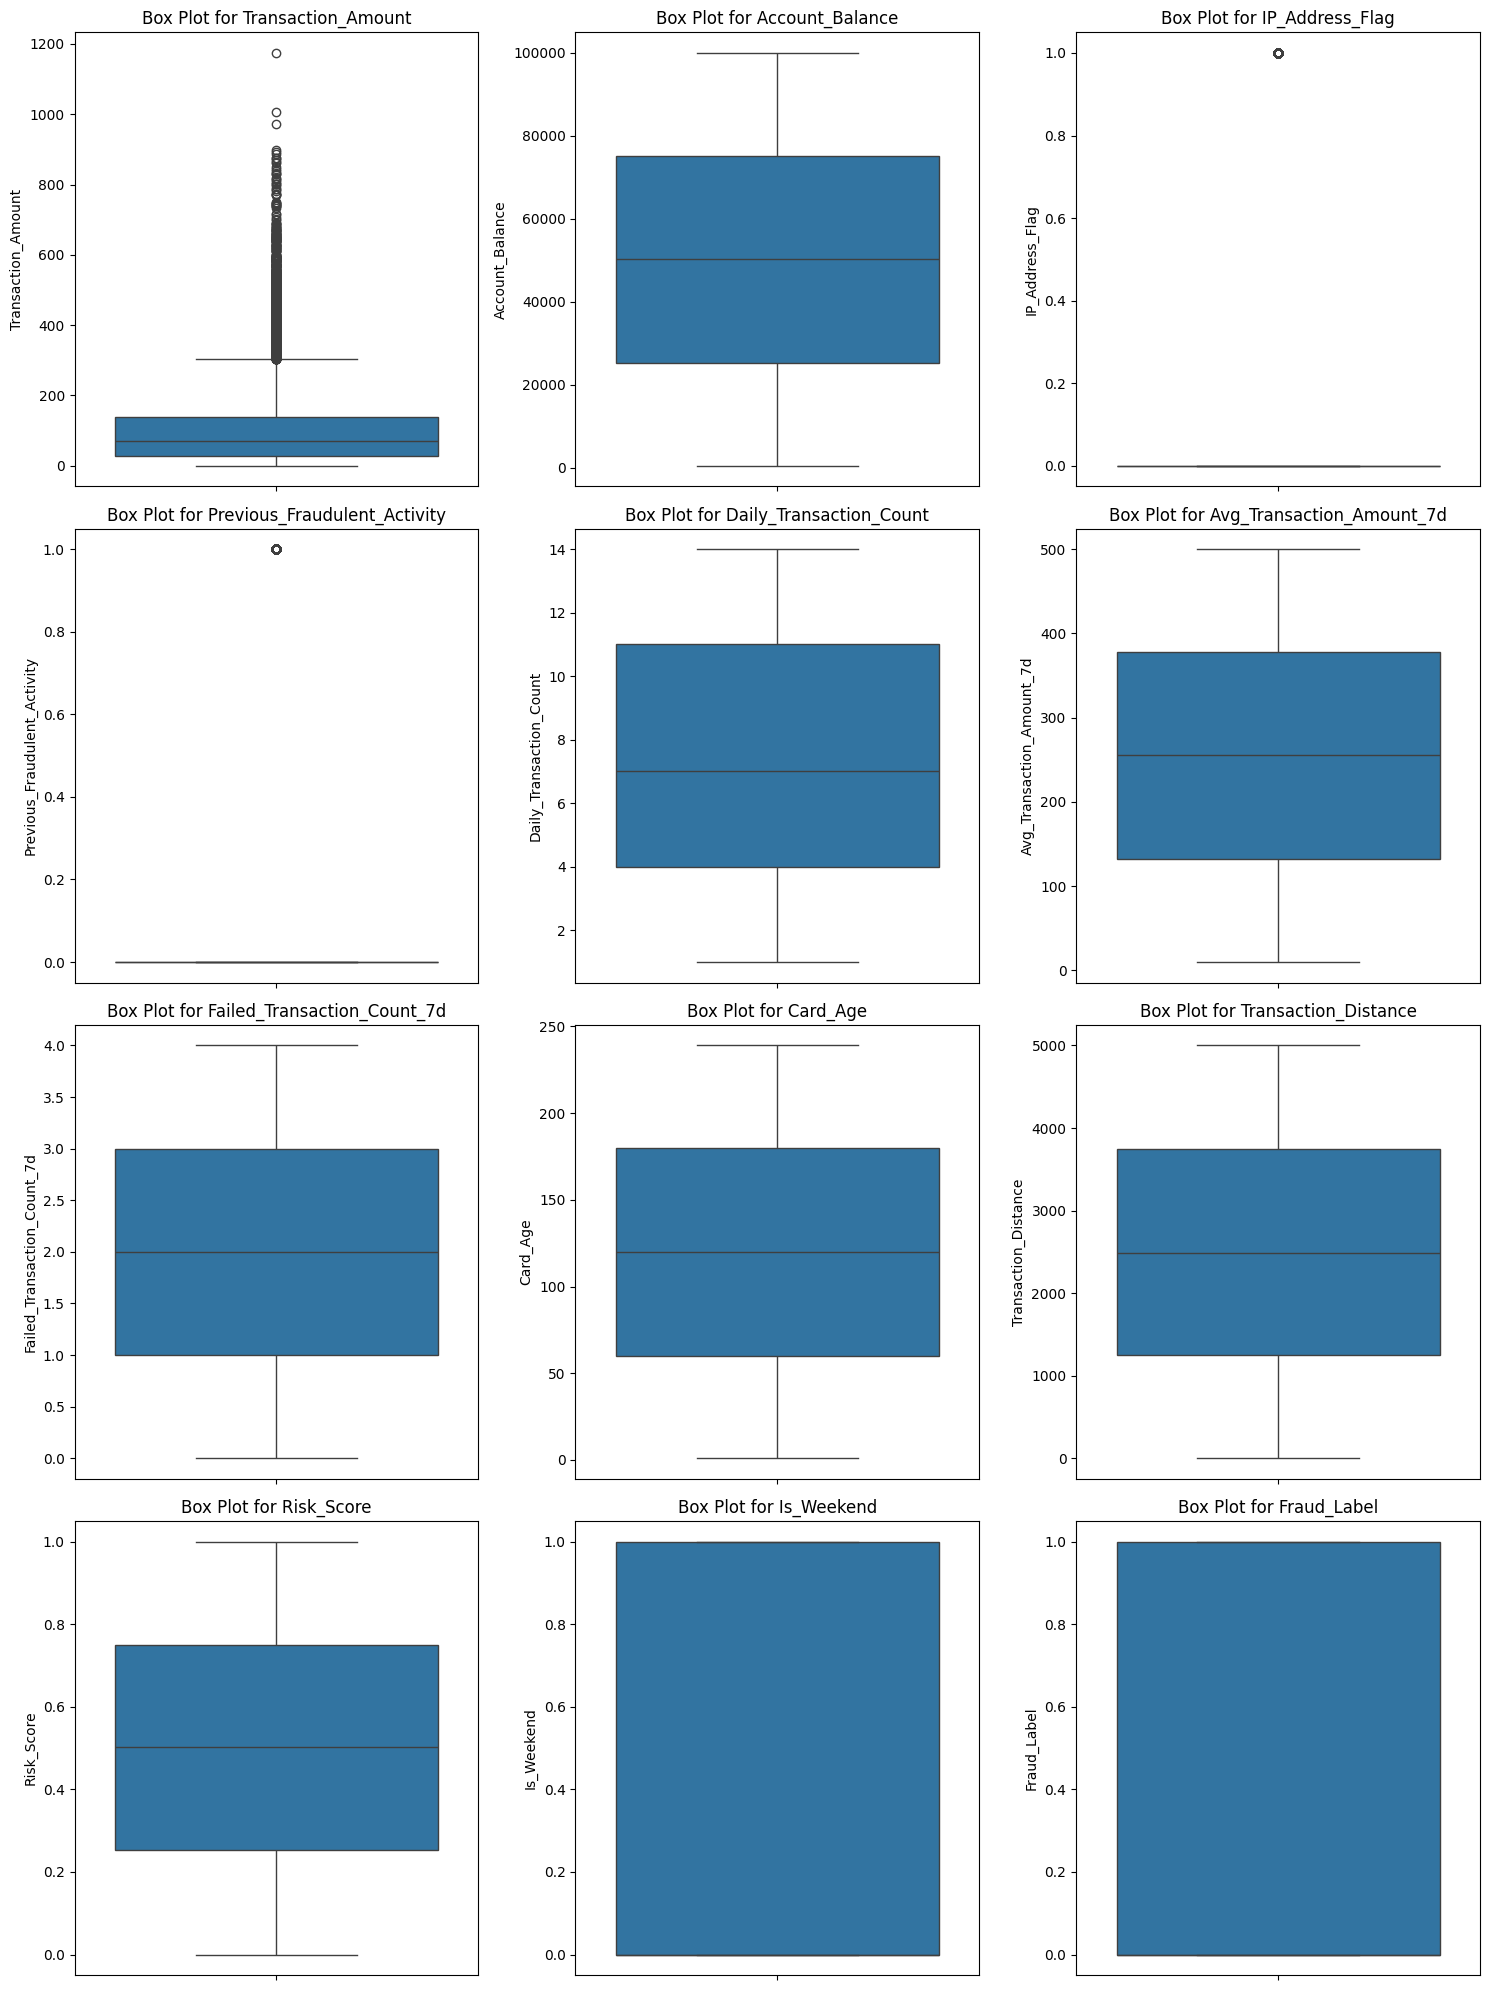

In [12]:
# Select only numerical columns
num_cols = df.select_dtypes(include=['number']).columns

# Define grid layout (e.g., 3 columns and dynamic rows)
n_cols = 3  # Number of columns
n_rows = -(-len(num_cols) // n_cols)  # Ceiling division to calculate rows

# Create subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 5 * n_rows))

# Flatten axes array if it's 2D
axes = axes.flatten()

# Create box plots for each numerical column
for i, column in enumerate(num_cols):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(f'Box Plot for {column}')

# Hide any empty subplots
for i in range(len(num_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [13]:
# Hapus outliers
def remove_outliers_iqr(df, columns, factor=1.5):
    df_filtered = df.copy()
    for col in columns:
        Q1 = df[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR

        # Keep only the values within the IQR range
        df_filtered = df_filtered[(df_filtered[col] >= lower_bound) & (df_filtered[col] <= upper_bound)]

    return df_filtered

# Select numerical columns to check for outliers
num_cols = df.select_dtypes(include=['number']).columns

# Apply IQR-based outlier removal
df_cleaned = remove_outliers_iqr(df, num_cols)

# Display the change in dataset size
print(f"Original Data Shape: {df.shape}")
print(f"After IQR Outlier Removal: {df_cleaned.shape}")

Original Data Shape: (50000, 21)
After IQR Outlier Removal: (40851, 21)


### Encoding Data Kategorikal

In [14]:
df_cleaned = df_cleaned.drop(columns=['Transaction_ID', 'User_ID'])
print("Kolom 'Transaction_ID' dan 'User_ID' telah dihapus.")
df_cleaned.head()

Kolom 'Transaction_ID' dan 'User_ID' telah dihapus.


Transaction_Amount Transaction_Type            Timestamp  Account_Balance  \
0               39.79              POS  2023-08-14 19:30:00         93213.17   
1                1.19    Bank Transfer  2023-06-07 04:01:00         75725.25   
2               28.96           Online  2023-06-20 15:25:00          1588.96   
3              254.32   ATM Withdrawal  2023-12-07 00:31:00         76807.20   
5              168.55           Online  2023-06-05 20:55:00         33236.94   

  Device_Type  Location Merchant_Category  IP_Address_Flag  \
0      Laptop    Sydney            Travel                0   
1      Mobile  New York          Clothing                0   
2      Tablet    Mumbai       Restaurants                0   
3      Tablet  New York          Clothing                0   
5      Laptop     Tokyo       Restaurants                0   

   Previous_Fraudulent_Activity  Daily_Transaction_Count  \
0                             0                        7   
1                             0                       13   
2                             0                       14   
3                             0                        8   
5                             0                        3   

   Avg_Transaction_Amount_7d  Failed_Transaction_Count_7d   Card_Type  \
0                     437.63                            3        Amex   
1                     478.76                            4  Mastercard   
2                      50.01                            4        Visa   
3                     182.48                            4        Visa   
5                     226.85                            2    Discover   

   Card_Age  Transaction_Distance Authentication_Method  Risk_Score  \
0        65                883.17             Biometric      0.8494   
1       186               2203.36              Password      0.0959   
2       226               1909.29             Biometric      0.8400   
3        76               1311.86                   OTP      0.7935   
5        51               1725.64                   OTP      0.0504   

   Is_Weekend  Fraud_Label  
0           0            0  
1           0            1  
2           0            1  
3           0            1  
5           0            0

In [15]:
df_cleaned['Timestamp'] = pd.to_datetime(df_cleaned['Timestamp'])
df_cleaned['Transaction_Hour'] = df_cleaned['Timestamp'].dt.hour
df_cleaned['Transaction_DayOfWeek'] = df_cleaned['Timestamp'].dt.dayofweek
df_cleaned['Transaction_Month'] = df_cleaned['Timestamp'].dt.month
df_cleaned = df_cleaned.drop(columns=['Timestamp'])

categorical_cols = df_cleaned.select_dtypes(include='object').columns
df_cleaned = pd.get_dummies(df_cleaned, columns=categorical_cols, drop_first=True)

print("Shape of DataFrame after encoding:", df_cleaned.shape)
df_cleaned.head()

Shape of DataFrame after encoding: (40851, 34)


Transaction_Amount  Account_Balance  IP_Address_Flag  \
0               39.79         93213.17                0   
1                1.19         75725.25                0   
2               28.96          1588.96                0   
3              254.32         76807.20                0   
5              168.55         33236.94                0   

   Previous_Fraudulent_Activity  Daily_Transaction_Count  \
0                             0                        7   
1                             0                       13   
2                             0                       14   
3                             0                        8   
5                             0                        3   

   Avg_Transaction_Amount_7d  Failed_Transaction_Count_7d  Card_Age  \
0                     437.63                            3        65   
1                     478.76                            4       186   
2                      50.01                            4       226   
3                     182.48                            4        76   
5                     226.85                            2        51   

   Transaction_Distance  Risk_Score  ...  Merchant_Category_Electronics  \
0                883.17      0.8494  ...                          False   
1               2203.36      0.0959  ...                          False   
2               1909.29      0.8400  ...                          False   
3               1311.86      0.7935  ...                          False   
5               1725.64      0.0504  ...                          False   

   Merchant_Category_Groceries  Merchant_Category_Restaurants  \
0                        False                          False   
1                        False                          False   
2                        False                           True   
3                        False                          False   
5                        False                           True   

   Merchant_Category_Travel  Card_Type_Discover  Card_Type_Mastercard  \
0                      True               False                 False   
1                     False               False                  True   
2                     False               False                 False   
3                     False               False                 False   
5                     False                True                 False   

   Card_Type_Visa  Authentication_Method_OTP  Authentication_Method_PIN  \
0           False                      False                      False   
1           False                      False                      False   
2            True                      False                      False   
3            True                       True                      False   
5           False                       True                      False   

   Authentication_Method_Password  
0                           False  
1                            True  
2                           False  
3                           False  
5                           False  

[5 rows x 34 columns]

### Standarisasi

In [16]:
scaler = StandardScaler()

# Memisahkan fitur (X) dan target (y)
X = df_cleaned.drop('Fraud_Label', axis=1)
# Hapus kolom 'Risk_Score' karena teridentifikasi sebagai penyebab data leakage
X = X.drop('Risk_Score', axis=1)
y = df_cleaned['Fraud_Label']

numeric_cols_for_scaling = X.select_dtypes(include=[np.number]).columns

# Menerapkan StandardScaler pada kolom numerik yang dipilih
X[numeric_cols_for_scaling] = scaler.fit_transform(X[numeric_cols_for_scaling])

print("Dataframe setelah standarisasi (5 baris pertama fitur X) dan penghapusan 'Risk_Score':")
print(X.head())
print("Shape of X after standardization:", X.shape)
print("Shape of y:", y.shape)

Dataframe setelah standarisasi (5 baris pertama fitur X) dan penghapusan 'Risk_Score':
   Transaction_Amount  Account_Balance  IP_Address_Flag  \
0           -0.629908         1.489318              0.0   
1           -1.168336         0.882012              0.0   
2           -0.780975        -1.692529              0.0   
3            2.362551         0.919585              0.0   
5            1.166153        -0.593485              0.0   

   Previous_Fraudulent_Activity  Daily_Transaction_Count  \
0                           0.0                -0.118781   
1                           0.0                 1.367916   
2                           0.0                 1.615699   
3                           0.0                 0.129002   
5                           0.0                -1.109913   

   Avg_Transaction_Amount_7d  Failed_Transaction_Count_7d  Card_Age  \
0                   1.286949                     0.707630 -0.797955   
1                   1.577295                     1.4146

In [17]:
# Atau, gabungkan X dan y lalu simpan sebagai satu CSV
df_preprocessed = X.copy()
df_preprocessed['Fraud_Label'] = y
df_preprocessed.to_csv('train_fraud.csv', index=False)
print("Dataset lengkap yang telah diproses disimpan ke 'full_preprocessed_dataset.csv'")

Dataset lengkap yang telah diproses disimpan ke 'full_preprocessed_dataset.csv'
